In [1]:
import pandas as pd
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import torch
from torch.nn.functional import softmax


In [6]:
!pip install transformers[sentencepiece]==4.10.0 datasets --quiet


     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2.8 MB 14.9 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 311 kB 75.3 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 67 kB 6.3 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3.3 MB 59.5 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 596 kB 65.4 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 895 kB 67.4 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1.1 MB 41.1 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1.1 MB 60.7 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñ

In [7]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("Maha/OGBV-gender-bert-hi-en-trac2a")

model = AutoModelForSequenceClassification.from_pretrained("Maha/OGBV-gender-bert-hi-en-trac2a")

Downloading:   0%|          | 0.00/558 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/996k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/943 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/712M [00:00<?, ?B/s]

In [8]:
!pip install tqdm

In [9]:
from tqdm.notebook import tqdm, trange


In [10]:
tweet_df = pd.read_csv("/content/drive/MyDrive/data_1mill.csv", lineterminator='\n')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (10,16,23,30) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [11]:
subset_df = tweet_df[tweet_df['language'].isin(['hi','en','ta'])]
hin_df = subset_df[subset_df['language'] == 'hi']

In [12]:
hin_df.shape

(206068, 42)

In [13]:
hin_df.head()

_id             tweet_id  ... date_created time_created
7   619dbbadde83f8b60cc9ac4c  1331203624798539777  ...          NaN          NaN
9   619dbbadde83f8b60cc9ac4e  1331136365224886272  ...          NaN          NaN
21  619dbbafde83f8b60cc9ac5a  1330202000970178561  ...          NaN          NaN
27  619dbbb1de83f8b60cc9ac60  1330161923753713671  ...          NaN          NaN
28  619dbbb1de83f8b60cc9ac61  1330161598783246336  ...          NaN          NaN

[5 rows x 42 columns]

In [14]:
hin_df=hin_df[['_id','tweet','language']]

In [15]:
hin_df.shape

(206068, 3)

In [16]:
def preprocess(text):
    new_text = []
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)

In [17]:
tweets=hin_df["tweet"].tolist()

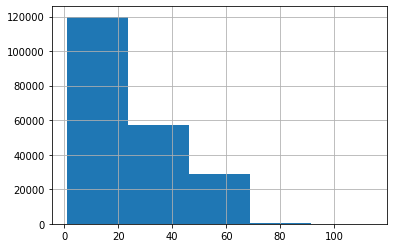

In [18]:
seq_len = [len(i.split()) for i in tweets]

pd.Series(seq_len).hist(bins = 5)

In [19]:
max(seq_len)

114

In [20]:
device = torch.device('cuda')
model.eval()
_ = model.to(device)

In [21]:
torch.cuda.empty_cache()

In [25]:
print('GPU memory: %.1f' % (torch.cuda.memory_allocated() // 1024 ** 2))

GPU memory: 760.0


In [26]:
label_map = {0: "None", 1: "Off/Hate"}

In [27]:
offense_list = []
offense_confidence = []
bs = 4
for x in trange(len(hin_df['tweet'])//bs):
    batch_x = list(hin_df['tweet'][x*bs:x*bs+bs])
    clean_x = [preprocess(tweet) for tweet in batch_x]
    encoded_input = tokenizer(clean_x, return_tensors='pt', padding=True, truncation=True, max_length=120)
    encoded_input.to(device)
    output = model(**encoded_input)
    out = softmax(output[0].data, dim=-1).detach().cpu()
    labels = [label_map[i] for i in torch.argmax(out,-1).numpy()]
    offense_list.extend(labels)
    for x_ind, y_ind in enumerate(torch.argmax(out,-1)):
        offense_confidence.append(round(out[x_ind, y_ind].item(),2))
    if(x%1000 == 0):
        print('GPU memory: %.1f' % (torch.cuda.memory_allocated() // 1024 ** 2))

  0%|          | 0/51517 [00:00<?, ?it/s]

GPU memory: 900.0
GPU memory: 1227.0
GPU memory: 1329.0
GPU memory: 1241.0
GPU memory: 1309.0
GPU memory: 1366.0
GPU memory: 1179.0
GPU memory: 1060.0
GPU memory: 1162.0
GPU memory: 915.0
GPU memory: 1115.0
GPU memory: 1391.0
GPU memory: 1267.0
GPU memory: 1297.0
GPU memory: 1180.0
GPU memory: 1366.0
GPU memory: 1327.0
GPU memory: 1139.0
GPU memory: 1381.0
GPU memory: 1092.0
GPU memory: 1228.0
GPU memory: 1313.0
GPU memory: 1381.0
GPU memory: 1375.0
GPU memory: 1340.0
GPU memory: 1190.0
GPU memory: 1385.0
GPU memory: 1242.0
GPU memory: 1374.0
GPU memory: 1145.0
GPU memory: 1109.0
GPU memory: 917.0
GPU memory: 1142.0
GPU memory: 1000.0
GPU memory: 1269.0
GPU memory: 864.0
GPU memory: 1341.0
GPU memory: 1013.0
GPU memory: 888.0
GPU memory: 919.0
GPU memory: 1126.0
GPU memory: 1375.0
GPU memory: 1038.0
GPU memory: 953.0
GPU memory: 1172.0
GPU memory: 1139.0
GPU memory: 1051.0
GPU memory: 973.0
GPU memory: 960.0
GPU memory: 1185.0
GPU memory: 1380.0
GPU memory: 820.0


In [28]:
len(offense_list)

206068

In [29]:
hin_df['bert-hi-trac2a-label'] = offense_list
hin_df['bert-hi-trac2a-confidence'] = offense_confidence

In [30]:
hin_df

_id  ... bert-hi-trac2a-confidence
7        619dbbadde83f8b60cc9ac4c  ...                      0.76
9        619dbbadde83f8b60cc9ac4e  ...                      0.91
21       619dbbafde83f8b60cc9ac5a  ...                      0.59
27       619dbbb1de83f8b60cc9ac60  ...                      0.52
28       619dbbb1de83f8b60cc9ac61  ...                      0.52
...                           ...  ...                       ...
1099649  61e14211e8241d3396cd45da  ...                      0.82
1099702  61e1421329158668d17aa289  ...                      0.60
1099710  61e142131cf48a3db760fbf0  ...                      0.70
1099895  61e14219d27c0a6f757ed657  ...                      0.94
1099955  61e1421bd27c0a6f757ed663  ...                      0.95

[206068 rows x 5 columns]

In [32]:
subset1_df = hin_df[hin_df['bert-hi-trac2a-label'].isin(['Off/Hate','None'])]
hate_hin_df = subset1_df[subset1_df['bert-hi-trac2a-label'] == 'Off/Hate']

In [33]:
hate_hin_df

_id  ... bert-hi-trac2a-confidence
21       619dbbafde83f8b60cc9ac5a  ...                      0.59
27       619dbbb1de83f8b60cc9ac60  ...                      0.52
28       619dbbb1de83f8b60cc9ac61  ...                      0.52
33       619dbbb1de83f8b60cc9ac66  ...                      0.75
35       619dbbb1de83f8b60cc9ac68  ...                      0.84
...                           ...  ...                       ...
1099437  61e1420c78928ade3ca7bbb6  ...                      0.67
1099444  61e1420ce8241d3396cd45b8  ...                      0.85
1099649  61e14211e8241d3396cd45da  ...                      0.82
1099702  61e1421329158668d17aa289  ...                      0.60
1099710  61e142131cf48a3db760fbf0  ...                      0.70

[131934 rows x 5 columns]

In [38]:
df1 = hate_hin_df.sort_values('bert-hi-trac2a-confidence',ascending = False).head(50)


In [41]:
df1.to_csv('hin_Top_50_bert_trac2a' , index=False)